In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('wine.csv')
df.isna().sum()
print('Before cleaning df count =',df.shape[0])
df = df.dropna()
df.isna().sum()
print('After cleaning df count =',df.shape[0])
df

Before cleaning df count = 6497
After cleaning df count = 6497


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color,quality_encode,wine_qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1,4
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1,4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1,4


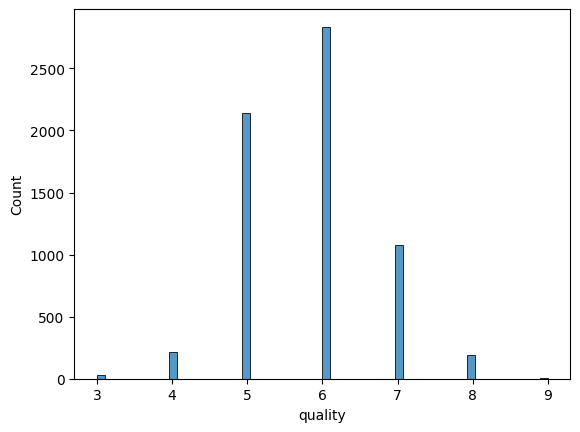

In [3]:
sns.histplot(df['quality'])
                           
df['quality_encode'] = np.where(df['quality'] >= 6, 1, 0)

df['wine_qual'] = np.where(((df['color'] == 'red') & (df['quality_encode'] == 0)),1,0)

df['wine_qual'] = np.where(((df['color'] == 'white') & (df['quality_encode'] == 0)),2,df['wine_qual'])

df['wine_qual'] = np.where(((df['color'] == 'red') & (df['quality_encode'] == 1)),3,df['wine_qual'])

df['wine_qual'] = np.where(((df['color'] == 'white') & (df['quality_encode'] == 1)),4,df['wine_qual'])
df

In [4]:
features = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']
# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['quality','color']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
             
principalDf

,principal component 1,principal component 2
0,-3.205996,0.416523
1,-3.039051,1.107462
2,-3.071893,0.878964
3,-1.571262,2.112545
4,-3.205996,0.416523
...,...,...
6492,-0.062824,-1.934205
6493,1.866989,0.524431
6494,0.571133,-0.722662
6495,0.090052,-3.545780


In [6]:
finalDf = pd.concat([principalDf, df[['quality','color']]], axis = 1)
finalDf

,principal component 1,principal component 2,quality,color
0,-3.205996,0.416523,5,red
1,-3.039051,1.107462,5,red
2,-3.071893,0.878964,5,red
3,-1.571262,2.112545,6,red
4,-3.205996,0.416523,5,red
...,...,...,...,...
6492,-0.062824,-1.934205,6,white
6493,1.866989,0.524431,5,white
6494,0.571133,-0.722662,6,white
6495,0.090052,-3.545780,7,white


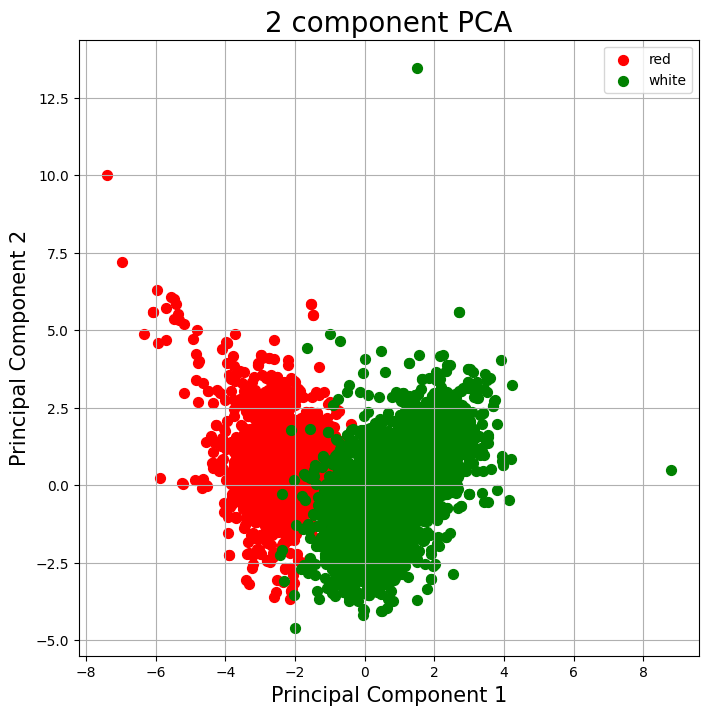

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['red', 'white']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['color'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
# Extract features and labels
features = df.iloc[:, :-4]
labels = df.iloc[:, -4:]

# Encode 'color' column using one-hot encoding
label_encoder = LabelEncoder()
color_encoded = label_encoder.fit_transform(labels['color'])
labels['color_encoded'] = color_encoded
features

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [9]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
# pca = PCA()
pca_result = pca.fit_transform(scaled_features)


In [10]:
pca.explained_variance_ratio_

array([0.2754426 , 0.22671146])

In [11]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)

In [12]:
# Apply K-Means clustering
num_clusters = 2  # For red/white wines
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state= 13)
cluster_assignments = kmeans.fit_predict(scaled_features)   

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


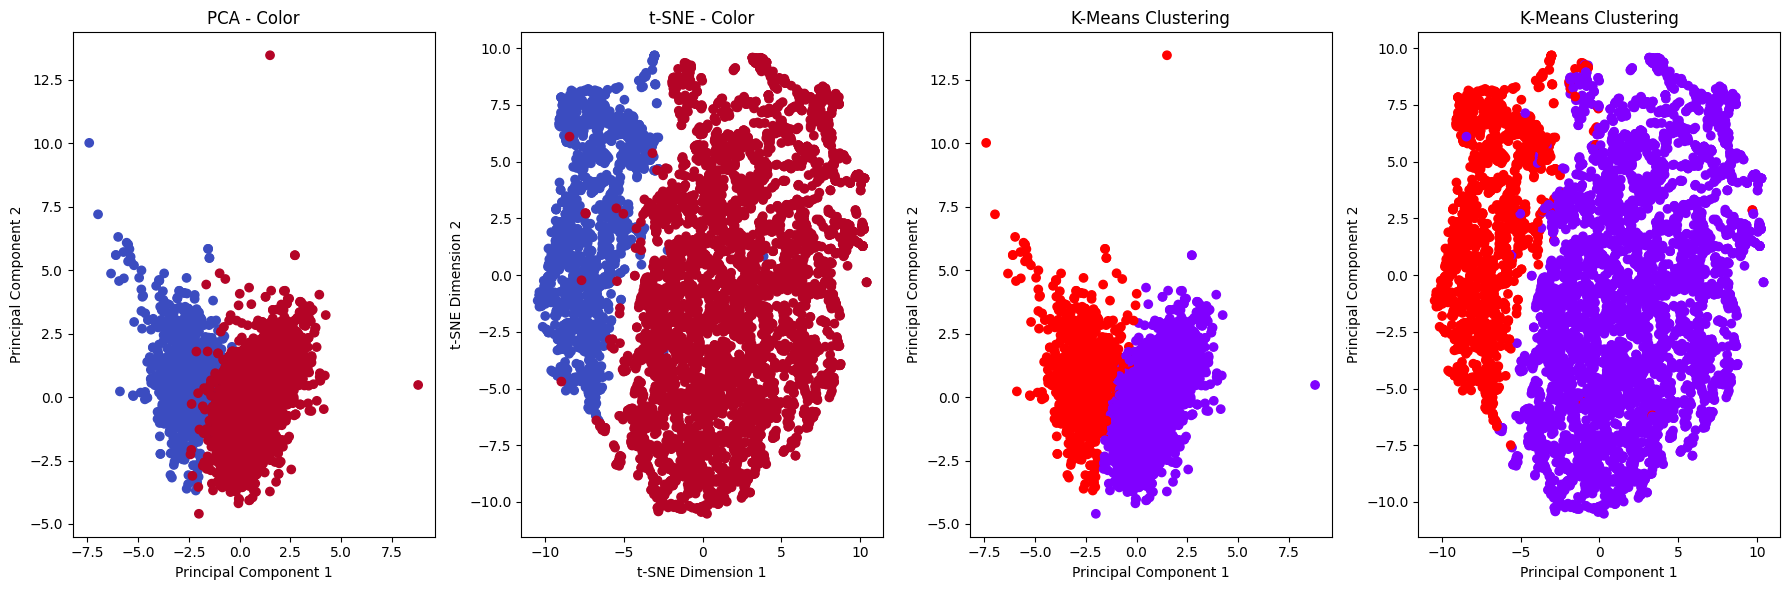

In [13]:
# Visualization
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels['color_encoded'], cmap='coolwarm')
plt.title('PCA - Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(142)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels['color_encoded'], cmap='coolwarm')
plt.title('t-SNE - Color')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(143)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(144)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [14]:
# Apply K-Means clustering
num_clusters = 2  # For red/white wines
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state= 13)
cluster_assignments = kmeans.fit_predict(scaled_features)  

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


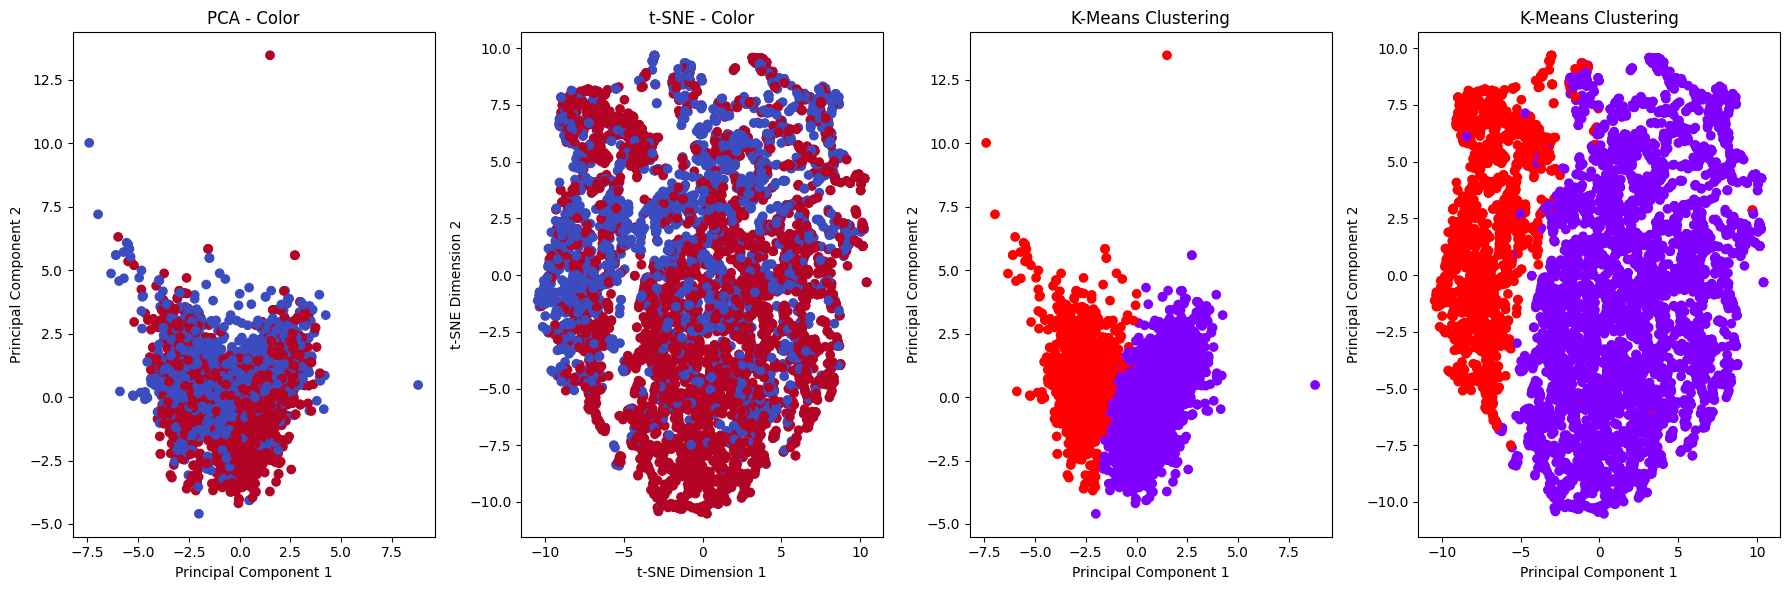

In [15]:
# Visualization
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels['quality_encode'], cmap='coolwarm')
plt.title('PCA - Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(142)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels['quality_encode'], cmap='coolwarm')
plt.title('t-SNE - Color')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(143)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(144)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()

In [16]:
# Apply K-Means clustering
num_clusters = 4  # For red/white wines
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state= 13)
cluster_assignments = kmeans.fit_predict(scaled_features) 

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


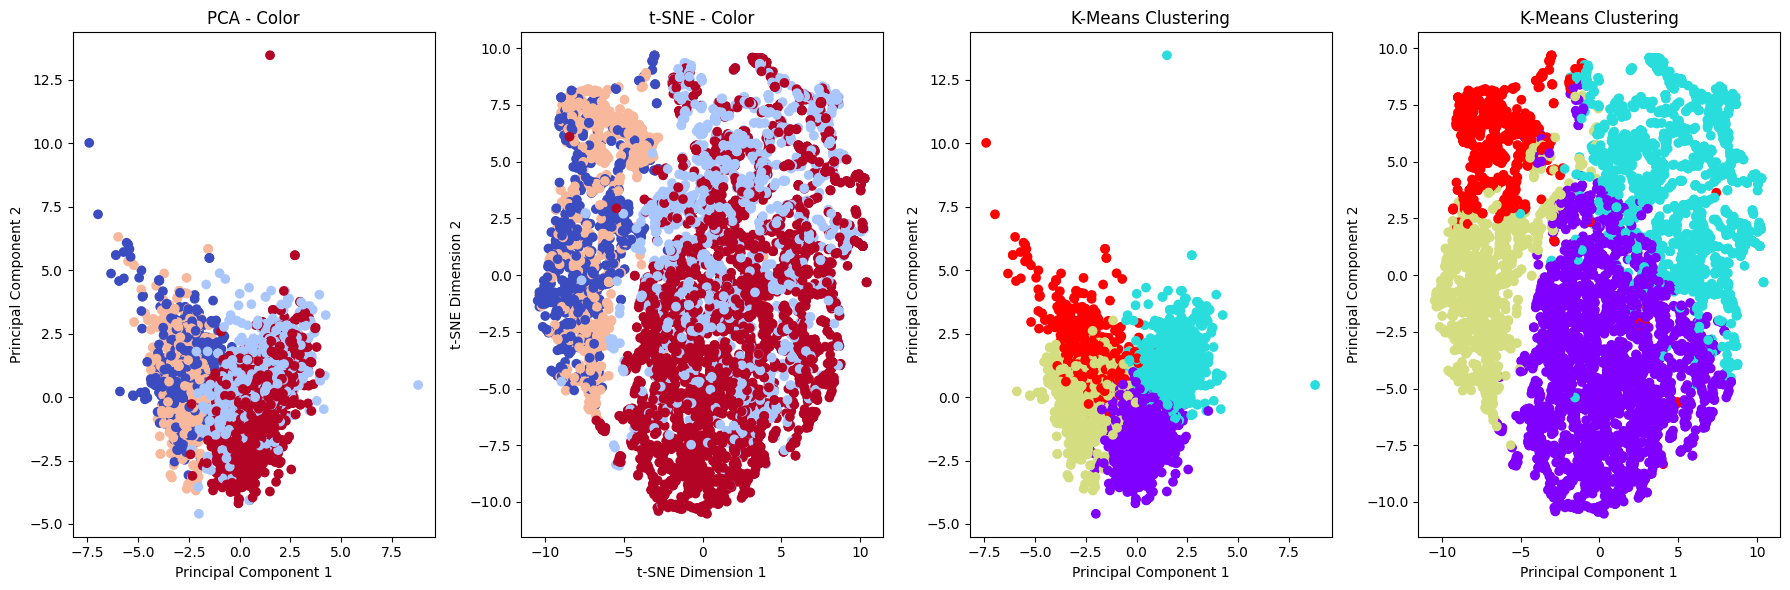

In [17]:
# Visualization
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels['wine_qual'], cmap='coolwarm')
plt.title('PCA - Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(142)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels['wine_qual'], cmap='coolwarm')
plt.title('t-SNE - Color')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(143)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(144)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()

In [18]:
pca_result_df = pd.DataFrame(pca_result, columns = ['principal component 1', 'principal component 2'])
pca_result_df

tsne_result_df = pd.DataFrame(tsne_result, columns = ['principal component 1', 'principal component 2'])


# Apply K-Means clustering
num_clusters = 2  # For red/white wines
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state= 13)
cluster_assignments_k = kmeans.fit_predict(pca_result_df) 

cluster_assignments_t = kmeans.fit_predict(tsne_result_df) 


labels['color']



c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6497, dtype: object

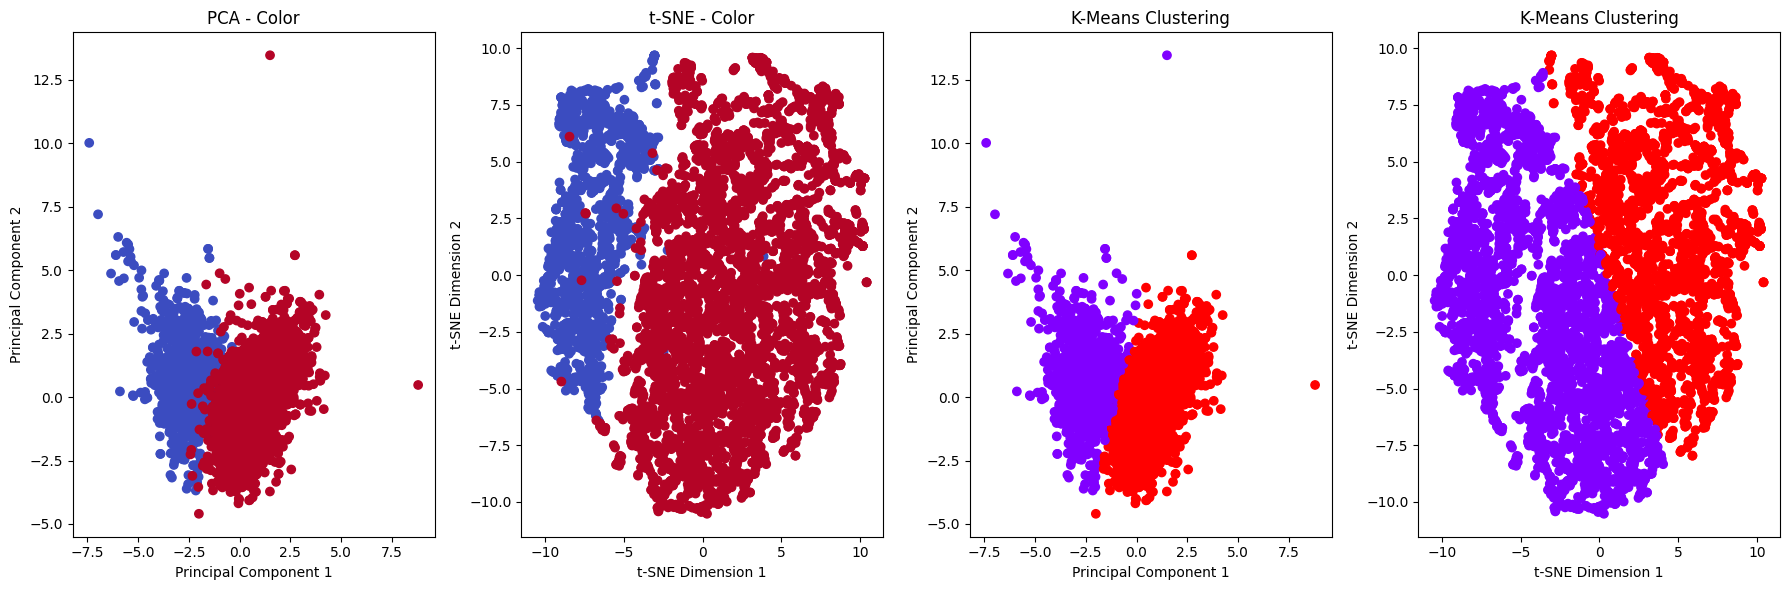

In [19]:
# Visualization
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.scatter(pca_result_df['principal component 1'], pca_result_df['principal component 2'], c=labels['color_encoded'], cmap='coolwarm')
plt.title('PCA - Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(142)
plt.scatter(tsne_result_df['principal component 1'], tsne_result_df['principal component 2'], c=labels['color_encoded'], cmap='coolwarm')
plt.title('t-SNE - Color')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(143)
plt.scatter(pca_result_df['principal component 1'], pca_result_df['principal component 2'], c=cluster_assignments_k, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(144)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_assignments_t, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()